<a href="https://colab.research.google.com/github/Sheefa96/Data-Science/blob/develop/Clustering(Airlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print("Libraries Imported")

Libraries Imported


In [6]:
# loading data into a dataframe
df=pd.read_excel("/content/EastWestAirlines.xlsx",sheet_name=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# checking null values and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
# creating a copy 
df1=df.copy()

In [9]:
# renaming column award? and dropping ID# column
df1.rename(columns={'Award?':'Award'},inplace=True)
df1.drop('ID#',axis=1,inplace=True)

In [10]:
#checking number of rows
df1.shape

(3999, 11)

In [11]:
# statistical summary
round(df1.describe(),2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.00,3999.00,3999.00,3999.00,3999.00,3999.00,3999.0,3999.00,3999.00,3999.00,3999.00
mean,73601.33,144.11,2.06,1.01,1.01,17144.85,11.6,460.06,1.37,4118.56,0.37
std,100775.66,773.66,1.38,0.15,0.20,24150.97,9.6,1400.21,3.79,2065.13,0.48
min,0.00,0.00,1.00,1.00,1.00,0.00,0.0,0.00,0.00,2.00,0.00
25%,18527.50,0.00,1.00,1.00,1.00,1250.00,3.0,0.00,0.00,2330.00,0.00
50%,43097.00,0.00,1.00,1.00,1.00,7171.00,12.0,0.00,0.00,4096.00,0.00
75%,92404.00,0.00,3.00,1.00,1.00,23800.50,17.0,311.00,1.00,5790.50,1.00
max,1704838.00,11148.00,5.00,3.00,5.00,263685.00,86.0,30817.00,53.00,8296.00,1.00


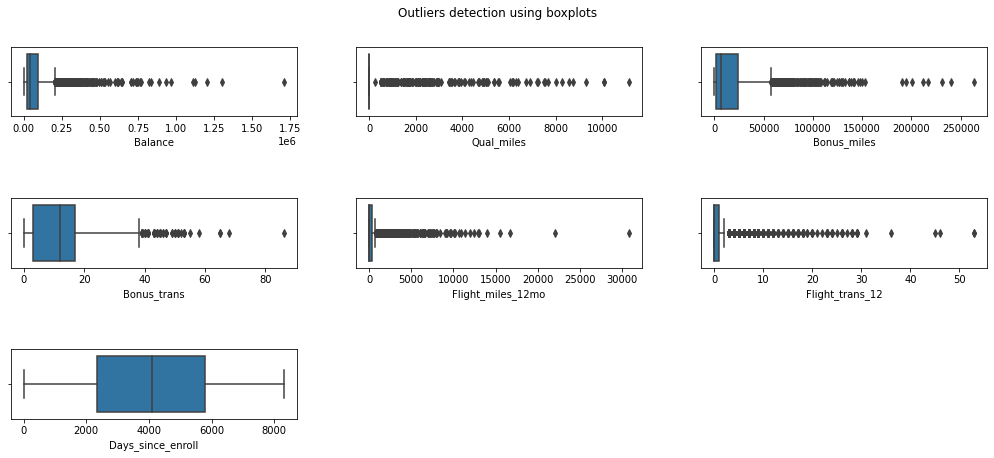

In [12]:
# boxplots for visualizing data distribution and outliers
fig, axes = plt.subplots(3,3, figsize=(15,7))

fig.suptitle('Outliers detection using boxplots')

sns.boxplot(ax=axes[0, 0],x=df1['Balance'])
sns.boxplot(ax=axes[0, 1],x=df1['Qual_miles'])
sns.boxplot(ax=axes[0, 2],x=df1['Bonus_miles'])
sns.boxplot(ax=axes[1, 0],x=df1['Bonus_trans'])
sns.boxplot(ax=axes[1, 1],x=df1['Flight_miles_12mo'])
sns.boxplot(ax=axes[1, 2],x=df1['Flight_trans_12'])
sns.boxplot(ax=axes[2, 0],x=df1['Days_since_enroll'])

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.tight_layout(5)
plt.show()

In [13]:
# Normalizing continuous data columns

from sklearn.preprocessing import MinMaxScaler

balance_ar=df1['Balance'].values.reshape(-1,1)
qual_ar=df1['Qual_miles'].values.reshape(-1,1)
bonus_ar=df1['Bonus_miles'].values.reshape(-1,1)
bonustrans_ar=df1['Bonus_trans'].values.reshape(-1,1)
flightmiles_ar=df1['Flight_miles_12mo'].values.reshape(-1,1)
flighttrans_ar=df1['Flight_trans_12'].values.reshape(-1,1)
enrol_ar=df1['Days_since_enroll'].values.reshape(-1,1)

scaler=MinMaxScaler()

df1['Balance']=scaler.fit_transform(balance_ar)
df1['Qual_miles']=scaler.fit_transform(qual_ar)
df1['Bonus_miles']=scaler.fit_transform(bonus_ar)
df1['Bonus_trans']=scaler.fit_transform(bonustrans_ar)
df1['Flight_miles_12mo']=scaler.fit_transform(flightmiles_ar)
df1['Flight_trans_12']=scaler.fit_transform(flighttrans_ar)
df1['Days_since_enroll']=scaler.fit_transform(enrol_ar)


In [14]:
df1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,2.059515,1.014504,1.012253,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,1.376919,0.147650,0.195241,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,1.000000,1.000000,1.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,1.000000,1.000000,1.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,3.000000,1.000000,1.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,5.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hierarchical Clustering

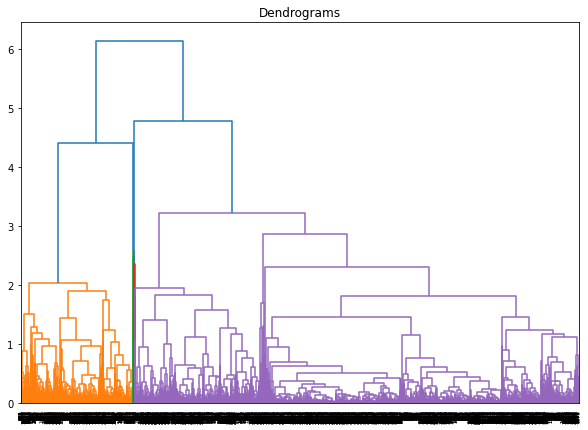

In [16]:
# Drawing the dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df1, method='complete'))

In [17]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
hc_score=0
hc_cluster=0
i=0
for c in range(3,10):
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(df1)
    score= silhouette_score (df1, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,3)
        hc_cluster=c
        
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(hc_score,hc_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.562 for optimal number of clusters-3.
Number of iterations: 7


In [18]:
# fitting the model to 3 clusters
hc3=AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc_pred=hc3.fit_predict(df1)

In [19]:
hc_df=df1.copy()
hc_df['clusters']=hc_pred
hc_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,1
1,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,1
2,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,1
3,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,1
4,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,0


In [20]:
# Using groupby function to sort by Clusters
hc_df.groupby(['clusters']).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
0,0.078745,0.015120,4.35092,1.001227,1.042945,0.205367,0.240220,0.020763,0.036439,0.594256,0.642945
1,0.034062,0.012348,1.47327,1.017925,1.000314,0.028783,0.107854,0.013429,0.023199,0.471214,0.300314
2,0.037846,0.026507,1.25000,1.000000,4.250000,0.277884,0.183140,0.018659,0.042453,0.511303,0.500000


# K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

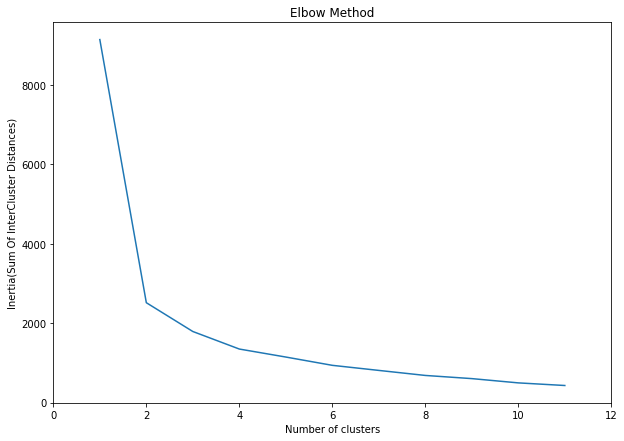

In [22]:
# Finding the optimum number of Clusters using Elbow plot
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,7))    
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlim(0,12)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia(Sum Of InterCluster Distances)')
plt.show()

From Elbow plot we can see that optimum number of clusters lie between 2 to 6.

In [23]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
km_score=0
km_cluster=0
i=0
for c in range(2,7):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(df1)
    score= silhouette_score (df1, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c
        
print("Maximum silhouette score is {} for optimal number of clusters-{}.".format(km_score,km_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.649 for optimal number of clusters-2.
Number of iterations: 5


In [24]:
# Fitting the model to 2 clusters
km2= KMeans(n_clusters=2, random_state=0)
km2_pred = km2.fit_predict(df1)

In [25]:
km_df=df1.copy()
km_df['clusters']=km2_pred
km_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,0
1,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,0
2,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,0
3,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,0
4,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,1


In [26]:
# Using groupby function to sort by Clusters
km_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
0,0.030480,0.012922,1.110377,1.021764,1.005441,0.01815,0.087776,0.014183,0.024742,0.459410,0.261562
1,0.066072,0.012937,3.772090,1.001403,1.024544,0.14959,0.219944,0.016275,0.028037,0.562945,0.566620


#DBSCAN Clustering

* Here number of features/dimensions= 12.
* No of minimum points to be considered is between 13 to 24.

Selecting optimum epsilon value using K-distance graph

In [27]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
nbrs  = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

In [28]:
distances[0:5]

array([[0.        , 0.00871531, 0.00982329, 0.01139457, 0.01277601,
        0.01331785, 0.01445224, 0.01522595, 0.0169149 , 0.0190791 ,
        0.02126834, 0.02209439, 0.02239988, 0.02272177, 0.02272459,
        0.02337595, 0.02411791, 0.025343  , 0.02845814, 0.02932871],
       [0.        , 0.01212297, 0.01331785, 0.01483947, 0.01590046,
        0.01979155, 0.0200706 , 0.02066999, 0.02338798, 0.02353866,
        0.02424792, 0.02439492, 0.02503437, 0.02696982, 0.02751054,
        0.0288704 , 0.03149609, 0.03166029, 0.03171017, 0.03473729],
       [0.        , 0.01857767, 0.01872551, 0.01892042, 0.02504777,
        0.02735412, 0.03149609, 0.03254401, 0.03579654, 0.03660932,
        0.03693779, 0.03716255, 0.0389617 , 0.04076305, 0.04179049,
        0.04185845, 0.04240907, 0.04293356, 0.04531016, 0.04552297],
       [0.        , 0.00982329, 0.01107883, 0.01188223, 0.01203399,
        0.01212297, 0.01284137, 0.01285681, 0.01463585, 0.01608839,
        0.01686919, 0.02122161, 0.02290527, 0

In [29]:
distances.shape

(3999, 20)

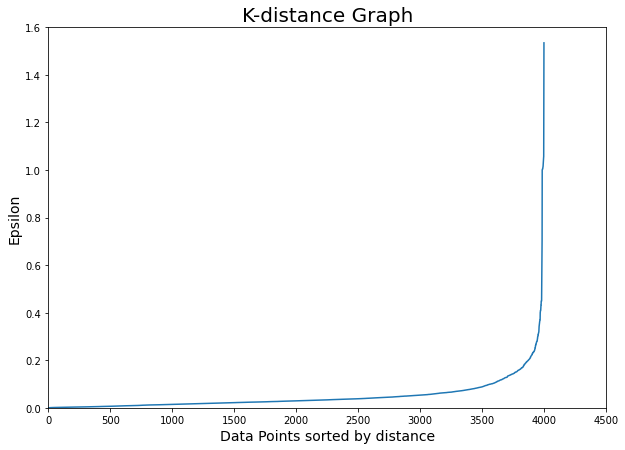

In [30]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10,7))
plt.plot(distances)

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.xlim(0,4500)
plt.ylim(0,1.6)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

* The optimal epsilon value is the point of maximum curvature in k-distance graph.
* Here epsilon can be between 0.3 to 1.00

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
scores=[]

db_score=0
samp=0
eps=0

i=0

for s in range(15,40,5):
    for e in np.arange(0.40,1.25,0.05):
        db=DBSCAN(eps=e,min_samples=s)
        db.fit(df1)
        db_pred=db.labels_
        score= silhouette_score (df1, db_pred, metric='euclidean')
        scores.append(score)
        i=i+1
        
        if(score>=max(scores)):
            
            db_score=round(score,3)
            eps=e
            samp=s
        
print("Maximum silhouette score is {} for minimum number of samples-{} and epsilon value-{}.".format(db_score,samp,eps))
print("Number of iterations:",i)


Maximum silhouette score is 0.666 for minimum number of samples-15 and epsilon value-0.75.
Number of iterations: 85


In [33]:
db=DBSCAN(eps=0.75,min_samples=15)
db.fit(df1)
db_pred=db.labels_


In [34]:
dbs_df=df1.copy()
dbs_df['clusters']=db_pred
dbs_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,0.016508,0.0,1,1,1,0.000660,0.011628,0.000000,0.000000,0.843742,0,0
1,0.011288,0.0,1,1,1,0.000815,0.023256,0.000000,0.000000,0.839884,0,0
2,0.024257,0.0,1,1,1,0.015636,0.046512,0.000000,0.000000,0.847842,0,0
3,0.008667,0.0,1,1,1,0.001896,0.011628,0.000000,0.000000,0.837955,0,0
4,0.057338,0.0,4,1,1,0.164211,0.302326,0.067398,0.075472,0.835905,1,1


In [35]:
# Using groupby function to sort by Clusters
dbs_df.groupby(['clusters']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clusters,,,,,,,,,,,
-1,0.061633,0.005230,2.065217,1.913043,2.065217,0.173895,0.277048,0.042410,0.065217,0.515207,0.586957
0,0.022214,0.007911,1.000000,1.000000,1.000000,0.009180,0.065145,0.007810,0.013184,0.429364,0.000000
1,0.054037,0.017380,4.000000,1.000000,1.000000,0.158284,0.239916,0.025178,0.045407,0.574593,1.000000
2,0.054745,0.004237,3.000000,1.000000,1.000000,0.071660,0.185406,0.005770,0.009636,0.503743,0.000000
3,0.051365,0.029077,1.000000,1.000000,1.000000,0.028581,0.104503,0.035081,0.063178,0.521792,1.000000
4,0.041979,0.016748,3.000000,1.000000,1.000000,0.079512,0.200468,0.015102,0.024402,0.540212,1.000000
5,0.039410,0.012964,2.000000,1.000000,1.000000,0.038588,0.163051,0.003638,0.006008,0.509379,0.000000
6,0.105580,0.020447,5.000000,1.000000,1.000000,0.310184,0.267990,0.030915,0.054468,0.664937,1.000000
7,0.079204,0.009535,4.000000,1.000000,1.000000,0.144957,0.208920,0.009136,0.013464,0.566596,0.000000


In [36]:
s={'Clustering techniques':['Hierarchical clustering','K-Means clustering','DBSCAN'],
   'Silhouette score':[hc_score,km_score,db_score],
   'Clusters predicted':[hc_cluster,km_cluster,11]}
clustering=pd.DataFrame(s)
clustering

,Clustering techniques,Silhouette score,Clusters predicted
0,Hierarchical clustering,0.562,3
1,K-Means clustering,0.649,2
2,DBSCAN,0.666,11


It can be seen that silhouette score for DBSCAN was the highest so best cluster segmentation was done by DBSCAN out of all the three algorithms.